<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r13_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r13-good.csv?token=AKVFSOAOPS4XXFNGTUJCSFS6X3RO2"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r13-mal.csv?token=AKVFSOEPYJ5CHBHHSKPBCB26X3RO6"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [222]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,133,0,3,2,1,4,3,9,24,8,29,13,1,2,2,1.0,12,7,1,7,7,49,0,2,8,8,6,27,18,1
1,172,4,0,3,1,4,3,9,29,13,24,8,1,2,0,0.0,4,6,2,7,12,84,0,3,12,12,9,27,27,1
2,173,4,0,4,1,1,5,17,29,13,0,0,1,4,0,0.0,5,5,3,7,15,105,0,4,4,4,20,85,100,1
3,174,4,0,4,2,2,5,17,29,13,0,0,1,4,0,0.0,6,4,4,7,16,112,0,8,16,16,20,85,100,1
4,175,4,0,4,3,2,5,17,29,13,0,0,1,4,0,0.0,7,3,5,7,15,105,0,12,24,24,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26837,3250540,4,2,4,1,1,5,17,30,14,0,0,10017,5,1,0.2,8,1,1,1,1,1,8,4,4,40068,20,85,100,1
26838,3250541,4,2,4,2,2,5,17,30,14,0,0,10017,5,1,0.2,9,1,1,1,1,1,8,8,16,160272,20,85,100,1
26839,3250542,4,2,4,3,2,5,17,30,14,0,0,10017,5,1,0.2,10,1,1,1,1,1,8,12,24,240408,20,85,100,1
26840,3250543,4,2,4,4,2,5,17,30,14,0,0,10017,5,1,0.2,11,1,1,1,1,1,8,16,32,320544,20,85,100,1


In [223]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,129,0,3,2,1,4,3,9,24,8,29,13,2,2,2,1.0,12,14,1,14,14,196,0,2,8,16,6,27,18,0
1,150,0,3,2,1,4,3,9,24,8,29,13,3,2,2,1.0,12,13,2,14,26,364,0,2,8,24,6,27,18,0
2,168,4,0,3,1,4,3,9,29,13,24,8,2,2,0,0.0,4,12,3,14,36,504,0,3,12,24,9,27,27,0
3,169,3,0,4,1,1,5,17,29,13,1,1,2,3,0,0.0,5,11,4,14,44,616,0,4,4,8,20,85,100,0
4,170,3,0,4,2,2,5,17,29,13,1,1,2,3,0,0.0,6,10,5,14,50,700,0,8,16,32,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27153,2021439,3,0,4,2,2,5,17,29,13,1,1,11079,3,0,0.0,5,1,1,1,1,1,0,8,16,177264,20,85,100,0
27154,2021440,3,0,4,3,2,5,17,29,13,1,1,11079,3,0,0.0,6,1,1,1,1,1,0,12,24,265896,20,85,100,0
27155,2021441,3,0,4,4,2,5,17,29,13,1,1,11079,3,0,0.0,7,1,1,1,1,1,0,16,32,354528,20,85,100,0
27156,2021442,2,0,3,1,4,3,10,29,13,26,10,11079,2,0,0.0,8,1,1,1,1,1,0,3,12,132948,9,30,27,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [225]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [227]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,129,0,3,2,1,4,3,9,24,8,29,13,2,2,2,1.0,12,14,1,14,14,196,0,2,8,16,6,27,18,0
1,133,0,3,2,1,4,3,9,24,8,29,13,1,2,2,1.0,12,7,1,7,7,49,0,2,8,8,6,27,18,1
2,150,0,3,2,1,4,3,9,24,8,29,13,3,2,2,1.0,12,13,2,14,26,364,0,2,8,24,6,27,18,0
3,168,4,0,3,1,4,3,9,29,13,24,8,2,2,0,0.0,4,12,3,14,36,504,0,3,12,24,9,27,27,0
4,169,3,0,4,1,1,5,17,29,13,1,1,2,3,0,0.0,5,11,4,14,44,616,0,4,4,8,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,3250540,4,2,4,1,1,5,17,30,14,0,0,10017,5,1,0.2,8,1,1,1,1,1,8,4,4,40068,20,85,100,1
53996,3250541,4,2,4,2,2,5,17,30,14,0,0,10017,5,1,0.2,9,1,1,1,1,1,8,8,16,160272,20,85,100,1
53997,3250542,4,2,4,3,2,5,17,30,14,0,0,10017,5,1,0.2,10,1,1,1,1,1,8,12,24,240408,20,85,100,1
53998,3250543,4,2,4,4,2,5,17,30,14,0,0,10017,5,1,0.2,11,1,1,1,1,1,8,16,32,320544,20,85,100,1


In [228]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.011221,0.037751,0.047715,0.005536,-0.008620,-0.056815,-0.056119,-0.045055,-0.046558,0.054652,0.052424,0.830729,0.008018,0.045442,0.031606,0.060206,-0.434849,-0.434841,-0.527119,-0.402571,-0.300726,0.012678,0.025856,0.019638,0.446118,-0.008595,-0.056987,-0.042269,0.435468
outport,-0.011221,1.000000,-0.626219,-0.313870,0.052317,-0.081546,0.800234,0.806745,0.529762,0.716155,-0.868848,-0.879089,-0.049765,0.669553,-0.700597,-0.903615,-0.721625,-0.063485,0.090489,0.016367,0.010640,-0.003233,0.475395,-0.176307,-0.132193,-0.126043,0.441607,0.804021,0.739357,0.059953
inport,0.037751,-0.626219,1.000000,0.307443,0.003898,-0.006075,-0.516984,-0.621679,-0.346590,-0.457537,0.539758,0.558587,0.045519,-0.177065,0.759819,0.822231,0.614117,-0.001864,-0.147049,-0.090256,-0.082989,-0.061670,0.329741,0.172261,0.129274,0.118725,-0.191628,-0.578255,-0.435574,0.005292
cache_coherence_type,0.047715,-0.313870,0.307443,1.000000,0.227418,-0.354474,-0.381186,-0.420226,-0.044718,-0.142496,0.268759,0.291363,0.058313,-0.201492,0.231163,0.307551,0.114924,-0.010297,-0.105716,-0.070315,-0.056731,-0.035298,-0.041246,0.506089,0.394085,0.318459,0.550739,-0.398128,-0.010264,0.007409
flit_id,0.005536,0.052317,0.003898,0.227418,1.000000,0.046281,0.224379,0.191937,-0.000722,-0.001607,-0.134104,-0.117304,0.004930,0.110804,-0.006560,-0.028340,0.288487,-0.058794,0.080548,0.013185,-0.006397,-0.005722,0.026230,0.927437,0.895064,0.654651,0.406093,0.211109,0.334119,0.003948
flit_type,-0.008620,-0.081546,-0.006075,-0.354474,0.046281,1.000000,-0.349737,-0.299171,0.001126,0.002505,0.209027,0.182841,-0.007684,-0.172709,0.010226,0.044173,0.329293,-0.010744,0.051983,0.024995,0.017008,0.016983,-0.040884,-0.016686,0.237698,0.172089,-0.632973,-0.329054,-0.520788,-0.006153
vnet,-0.056815,0.800234,-0.516984,-0.381186,0.224379,-0.349737,1.000000,0.974304,0.386556,0.531344,-0.930552,-0.923108,-0.065221,0.725823,-0.509741,-0.685275,-0.595319,-0.038180,0.122105,0.050866,0.032528,0.010375,0.312456,-0.050004,-0.080637,-0.099189,0.561724,0.990720,0.928362,-0.011442
vc,-0.056119,0.806745,-0.621679,-0.420226,0.191937,-0.299171,0.974304,1.000000,0.393338,0.534659,-0.909566,-0.904767,-0.062951,0.661210,-0.584554,-0.743351,-0.608940,-0.030723,0.134725,0.063036,0.045905,0.022415,0.206252,-0.085185,-0.103532,-0.114258,0.503588,0.995079,0.884874,-0.013910
src_ni,-0.045055,0.529762,-0.346590,-0.044718,-0.000722,0.001126,0.386556,0.393338,1.000000,0.952305,-0.422350,-0.423665,-0.049664,0.082529,-0.682054,-0.526062,-0.498972,-0.012386,0.064964,0.031867,0.024839,0.011795,0.300693,-0.059303,-0.035478,-0.053201,0.308982,0.388258,0.400125,-0.010240
src_router,-0.046558,0.716155,-0.457537,-0.142496,-0.001607,0.002505,0.531344,0.534659,0.952305,1.000000,-0.583891,-0.586085,-0.049964,0.277473,-0.723947,-0.698510,-0.611136,-0.024753,0.080887,0.034023,0.027839,0.013536,0.421991,-0.118037,-0.078514,-0.085422,0.352203,0.530064,0.517420,-0.013487


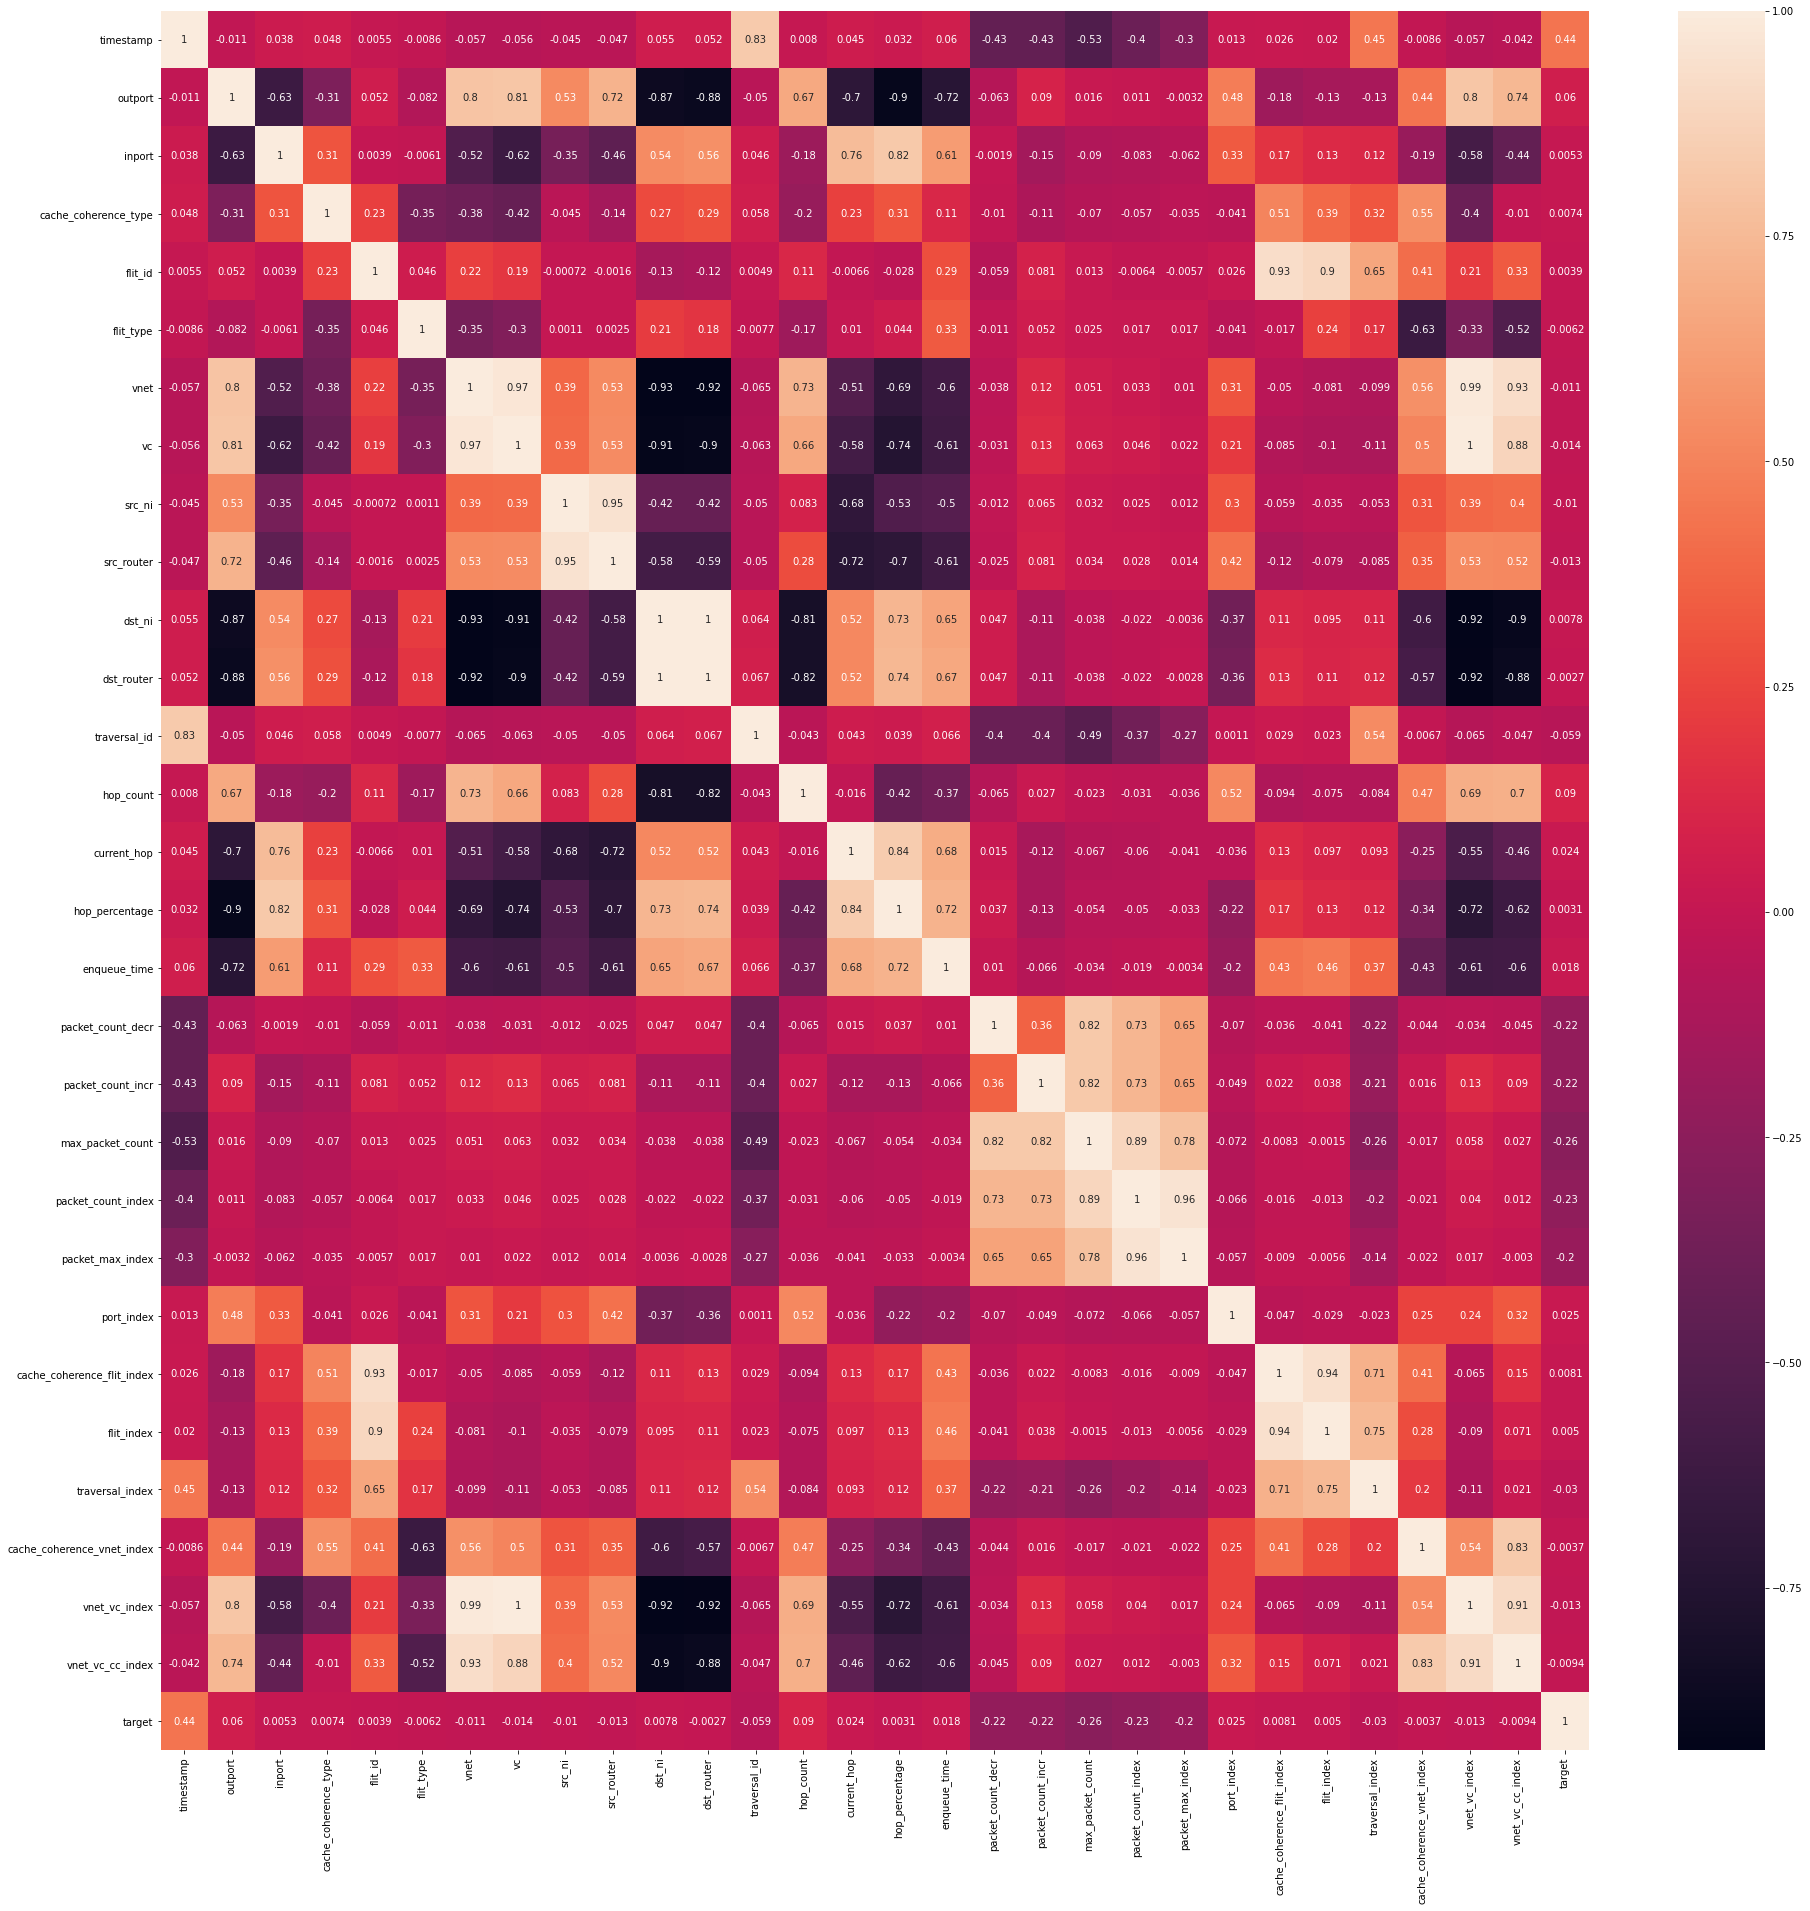

In [229]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [230]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,2,1,4,3,9,29,13,2,2,2,1.0,12,14,1,14,14,196,0,2,8,16,6,27,18
1,0,3,2,1,4,3,9,29,13,1,2,2,1.0,12,7,1,7,7,49,0,2,8,8,6,27,18
2,0,3,2,1,4,3,9,29,13,3,2,2,1.0,12,13,2,14,26,364,0,2,8,24,6,27,18
3,4,0,3,1,4,3,9,24,8,2,2,0,0.0,4,12,3,14,36,504,0,3,12,24,9,27,27
4,3,0,4,1,1,5,17,1,1,2,3,0,0.0,5,11,4,14,44,616,0,4,4,8,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,4,2,4,1,1,5,17,0,0,10017,5,1,0.2,8,1,1,1,1,1,8,4,4,40068,20,85,100
53996,4,2,4,2,2,5,17,0,0,10017,5,1,0.2,9,1,1,1,1,1,8,8,16,160272,20,85,100
53997,4,2,4,3,2,5,17,0,0,10017,5,1,0.2,10,1,1,1,1,1,8,12,24,240408,20,85,100
53998,4,2,4,4,2,5,17,0,0,10017,5,1,0.2,11,1,1,1,1,1,8,16,32,320544,20,85,100


In [231]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.00,0.75,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000090,0.2,0.50,1.0,0.133333,0.481481,0.000000,0.481481,0.062201,0.033169,0.000000,0.034483,0.046512,0.000012,0.166667,0.000000,0.098901
1,0.00,0.75,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000000,0.2,0.50,1.0,0.133333,0.222222,0.000000,0.222222,0.028708,0.008165,0.000000,0.034483,0.046512,0.000004,0.166667,0.000000,0.098901
2,0.00,0.75,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000181,0.2,0.50,1.0,0.133333,0.444444,0.037037,0.481481,0.119617,0.061745,0.000000,0.034483,0.046512,0.000020,0.166667,0.000000,0.098901
3,1.00,0.00,0.333333,0.00,1.000000,0.0,0.000000,0.800000,0.571429,0.000090,0.2,0.00,0.0,0.000000,0.407407,0.074074,0.481481,0.167464,0.085559,0.000000,0.068966,0.093023,0.000020,0.333333,0.000000,0.197802
4,0.75,0.00,0.500000,0.00,0.000000,1.0,0.727273,0.033333,0.071429,0.000090,0.4,0.00,0.0,0.016667,0.370370,0.111111,0.481481,0.205742,0.104610,0.000000,0.103448,0.000000,0.000004,0.944444,0.794521,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,1.00,0.50,0.500000,0.00,0.000000,1.0,0.727273,0.000000,0.000000,0.904134,0.8,0.25,0.2,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.103448,0.000000,0.040184,0.944444,0.794521,1.000000
53996,1.00,0.50,0.500000,0.25,0.333333,1.0,0.727273,0.000000,0.000000,0.904134,0.8,0.25,0.2,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.241379,0.139535,0.160748,0.944444,0.794521,1.000000
53997,1.00,0.50,0.500000,0.50,0.333333,1.0,0.727273,0.000000,0.000000,0.904134,0.8,0.25,0.2,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.379310,0.232558,0.241124,0.944444,0.794521,1.000000
53998,1.00,0.50,0.500000,0.75,0.333333,1.0,0.727273,0.000000,0.000000,0.904134,0.8,0.25,0.2,0.116667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.517241,0.325581,0.321499,0.944444,0.794521,1.000000


In [232]:
train_X[train_X.duplicated()].shape

(436, 26)

In [233]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.626219,-0.313870,0.052317,-0.081546,0.800234,0.806745,-0.868848,-0.879089,-0.049765,0.669553,-0.700597,-0.903615,-0.721625,-0.063485,0.090489,0.016367,0.010640,-0.003233,0.475395,-0.176307,-0.132193,-0.126043,0.441607,0.804021,0.739357,0.059953
inport,-0.626219,1.000000,0.307443,0.003898,-0.006075,-0.516984,-0.621679,0.539758,0.558587,0.045519,-0.177065,0.759819,0.822231,0.614117,-0.001864,-0.147049,-0.090256,-0.082989,-0.061670,0.329741,0.172261,0.129274,0.118725,-0.191628,-0.578255,-0.435574,0.005292
cache_coherence_type,-0.313870,0.307443,1.000000,0.227418,-0.354474,-0.381186,-0.420226,0.268759,0.291363,0.058313,-0.201492,0.231163,0.307551,0.114924,-0.010297,-0.105716,-0.070315,-0.056731,-0.035298,-0.041246,0.506089,0.394085,0.318459,0.550739,-0.398128,-0.010264,0.007409
flit_id,0.052317,0.003898,0.227418,1.000000,0.046281,0.224379,0.191937,-0.134104,-0.117304,0.004930,0.110804,-0.006560,-0.028340,0.288487,-0.058794,0.080548,0.013185,-0.006397,-0.005722,0.026230,0.927437,0.895064,0.654651,0.406093,0.211109,0.334119,0.003948
flit_type,-0.081546,-0.006075,-0.354474,0.046281,1.000000,-0.349737,-0.299171,0.209027,0.182841,-0.007684,-0.172709,0.010226,0.044173,0.329293,-0.010744,0.051983,0.024995,0.017008,0.016983,-0.040884,-0.016686,0.237698,0.172089,-0.632973,-0.329054,-0.520788,-0.006153
vnet,0.800234,-0.516984,-0.381186,0.224379,-0.349737,1.000000,0.974304,-0.930552,-0.923108,-0.065221,0.725823,-0.509741,-0.685275,-0.595319,-0.038180,0.122105,0.050866,0.032528,0.010375,0.312456,-0.050004,-0.080637,-0.099189,0.561724,0.990720,0.928362,-0.011442
vc,0.806745,-0.621679,-0.420226,0.191937,-0.299171,0.974304,1.000000,-0.909566,-0.904767,-0.062951,0.661210,-0.584554,-0.743351,-0.608940,-0.030723,0.134725,0.063036,0.045905,0.022415,0.206252,-0.085185,-0.103532,-0.114258,0.503588,0.995079,0.884874,-0.013910
dst_ni,-0.868848,0.539758,0.268759,-0.134104,0.209027,-0.930552,-0.909566,1.000000,0.996821,0.063680,-0.814947,0.517375,0.728812,0.651947,0.047361,-0.109857,-0.037879,-0.022259,-0.003561,-0.369307,0.113871,0.095132,0.109576,-0.599634,-0.923127,-0.898446,0.007776
dst_router,-0.879089,0.558587,0.291363,-0.117304,0.182841,-0.923108,-0.904767,0.996821,1.000000,0.066883,-0.816365,0.524662,0.736906,0.668109,0.046606,-0.109330,-0.038017,-0.022174,-0.002837,-0.357208,0.134352,0.108442,0.120832,-0.572684,-0.916759,-0.881306,-0.002678
traversal_id,-0.049765,0.045519,0.058313,0.004930,-0.007684,-0.065221,-0.062951,0.063680,0.066883,1.000000,-0.042792,0.042760,0.039472,0.065721,-0.403200,-0.403149,-0.488728,-0.366083,-0.267141,0.001058,0.028703,0.022586,0.536402,-0.006700,-0.064831,-0.047100,-0.058778


Principal Component Analysis

In [234]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[ 1.48726474, -0.80793701, -0.01872872, ...,  0.85023123,
         0.25917998, -0.04172839],
       [ 1.48806887, -0.80156066, -0.02547922, ...,  0.78194347,
         0.15842522, -0.03908758],
       [ 1.48669471, -0.80801059, -0.01707979, ...,  0.85510293,
         0.26530017, -0.04227418],
       ...,
       [-1.2061296 ,  0.16489567, -0.38577876, ..., -0.27723246,
        -0.32353483, -0.10825198],
       [-1.20878075,  0.43528249, -0.28098742, ..., -0.25959826,
        -0.32331689, -0.14312398],
       [-1.17305432,  0.83091061,  0.02272332, ..., -0.19554955,
        -0.37778071, -0.07636109]])

In [235]:
pca.explained_variance_ratio_

array([0.58900904, 0.13248636, 0.08096279, 0.05726379, 0.04415611,
       0.03860133, 0.02208783])

Text(0, 0.5, 'Variance')

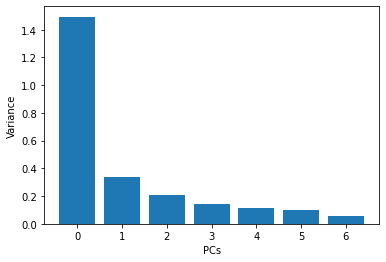

In [236]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [237]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,1.487265,-0.807937,-0.018729,0.330581,0.850231,0.259180,-0.041728
1,1.488069,-0.801561,-0.025479,0.344564,0.781943,0.158425,-0.039088
2,1.486695,-0.808011,-0.017080,0.330121,0.855103,0.265300,-0.042274
3,0.429701,-1.129534,0.924447,0.306732,0.117602,0.667055,0.105827
4,-1.194606,-0.603731,-0.067266,-0.655671,0.337103,0.456627,0.010826
...,...,...,...,...,...,...,...
53995,-1.226025,-0.382385,-0.737221,0.057446,-0.373491,-0.298325,-0.125832
53996,-1.203478,-0.105491,-0.490570,0.292849,-0.294867,-0.323753,-0.073380
53997,-1.206130,0.164896,-0.385779,0.321540,-0.277232,-0.323535,-0.108252
53998,-1.208781,0.435282,-0.280987,0.350231,-0.259598,-0.323317,-0.143124


In [238]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-1.062479e-14,-2.314154e-15,5.806800e-16,2.967723e-15,-1.669807e-15,1.531778e-15,-0.002813
1,-1.062479e-14,1.000000e+00,-2.477280e-16,2.262423e-16,7.884918e-16,-1.931274e-16,8.342163e-16,0.001922
2,-2.314154e-15,-2.477280e-16,1.000000e+00,-1.982626e-16,-3.600075e-16,3.219448e-16,-2.981628e-16,-0.020111
3,5.806800e-16,2.262423e-16,-1.982626e-16,1.000000e+00,-1.169733e-15,8.947948e-16,6.812738e-18,0.049228
4,2.967723e-15,7.884918e-16,-3.600075e-16,-1.169733e-15,1.000000e+00,-3.572823e-16,1.226574e-15,-0.040658
5,-1.669807e-15,-1.931274e-16,3.219448e-16,8.947948e-16,-3.572823e-16,1.000000e+00,-6.451145e-16,0.014437
6,1.531778e-15,8.342163e-16,-2.981628e-16,6.812738e-18,1.226574e-15,-6.451145e-16,1.000000e+00,0.033185
target,-2.813489e-03,1.921885e-03,-2.011146e-02,4.922828e-02,-4.065802e-02,1.443733e-02,3.318514e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

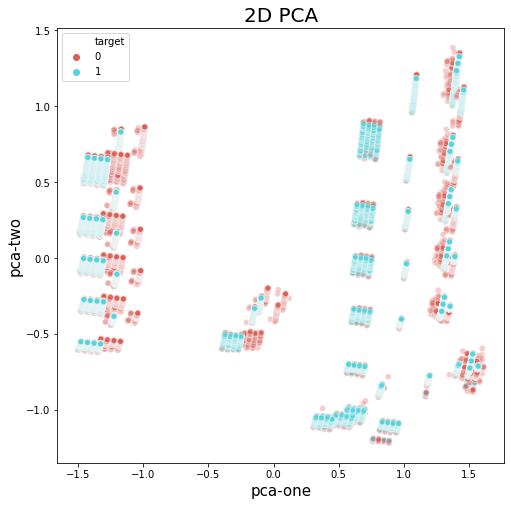

In [240]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

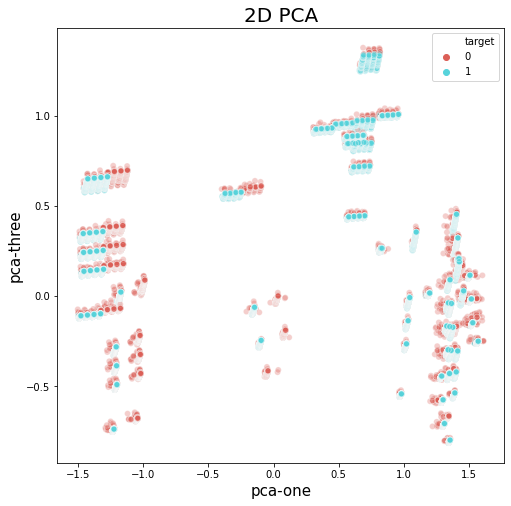

In [241]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

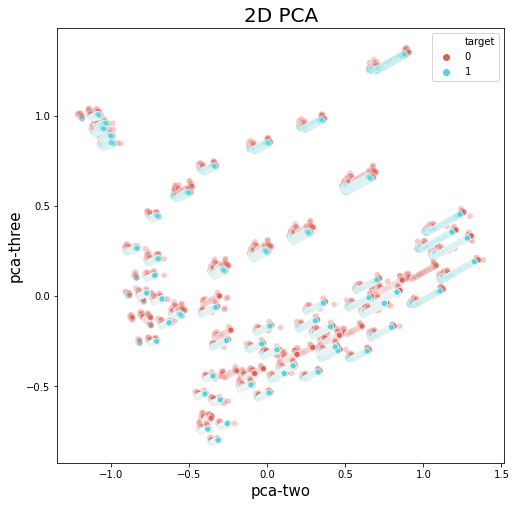

In [242]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

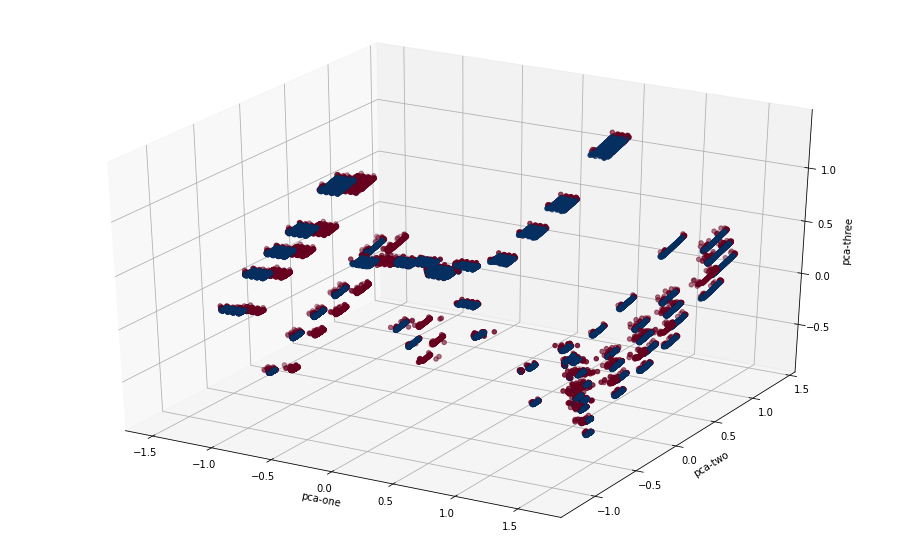

In [243]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

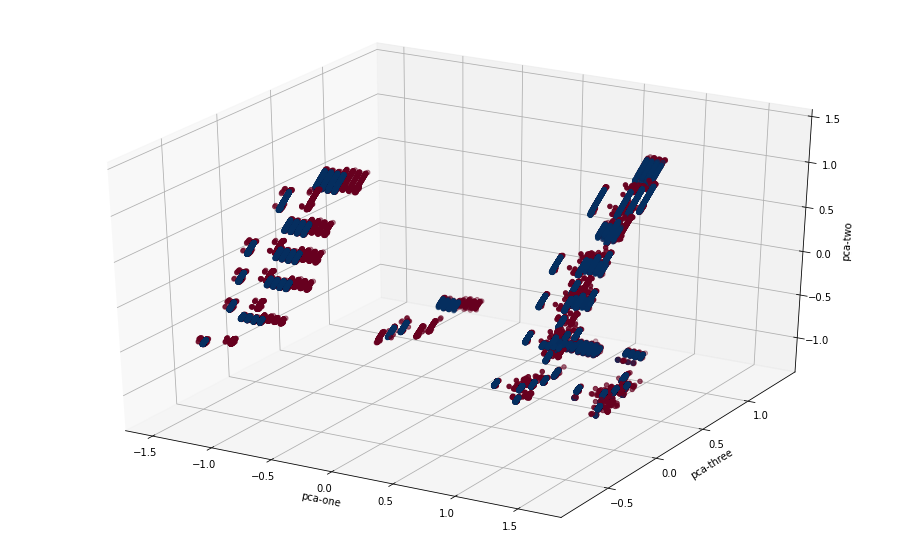

In [244]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

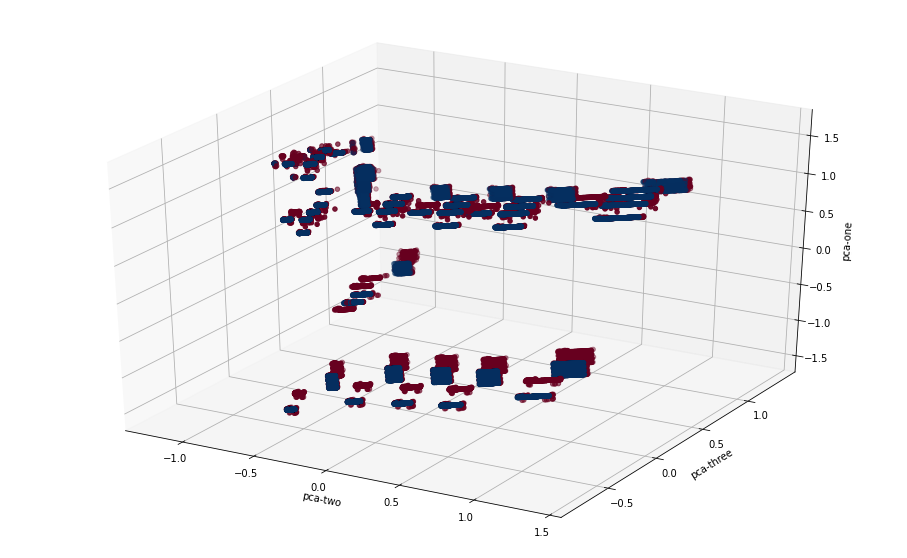

In [245]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [246]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 242.29163193702698 seconds


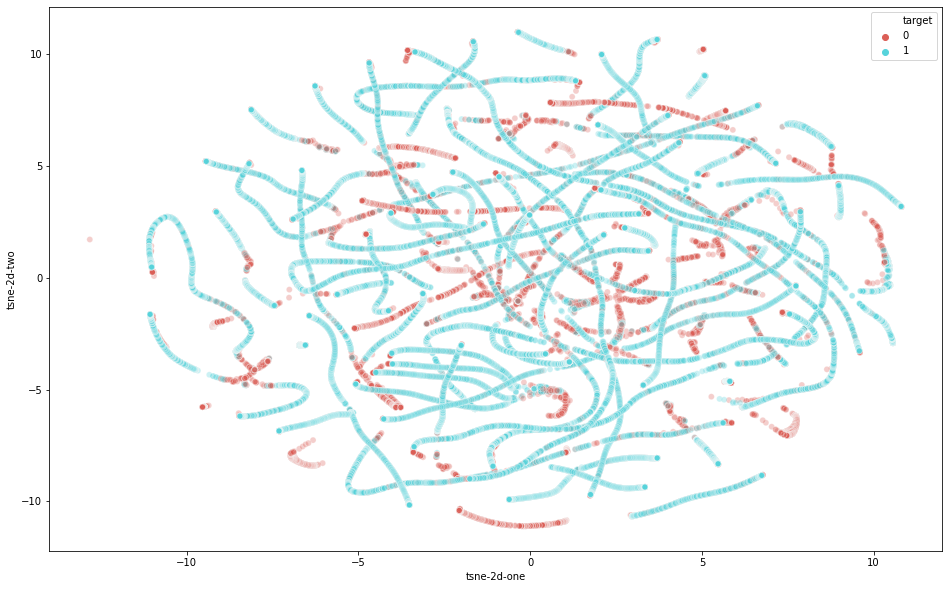

In [247]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

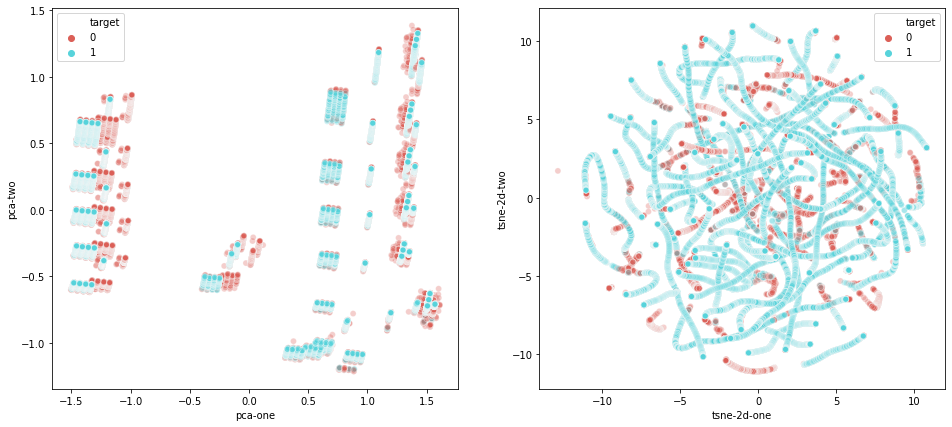

In [248]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [249]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 277.79254603385925 seconds


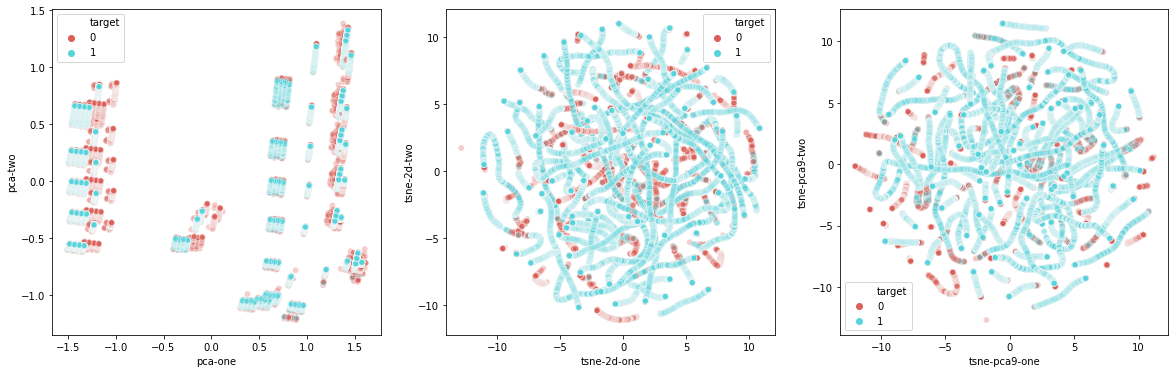

In [250]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [252]:
train_Y = df['target']
train_Y.value_counts()

0    27158
1    26842
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
16            max_packet_count  1040.178778
15           packet_count_incr   522.655717
14           packet_count_decr   517.524754
17          packet_count_index   463.754297
18            packet_max_index   294.076284
10                   hop_count    59.422888
0                      outport    50.373742
9                 traversal_id    23.377617
19                  port_index    12.465291
22             traversal_index     7.951879
11                 current_hop     6.291924
6                           vc     3.299777
5                         vnet     3.132896
24               vnet_vc_index     3.048276
13                enqueue_time     2.407891
7                       dst_ni     1.192087
20  cache_coherence_flit_index     0.535980


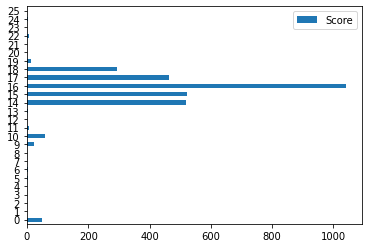

In [255]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [258]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [259]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 70.2662037037037
Test Prediction  70.86111111111111


In [260]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
10,hop_count,11.198565
7,dst_ni,9.103218
12,hop_percentage,6.220224
0,outport,4.150325
13,enqueue_time,4.020321
3,flit_id,1.854905
23,cache_coherence_vnet_index,1.357581
25,vnet_vc_cc_index,1.228913
6,vc,0.989871
5,vnet,0.963042


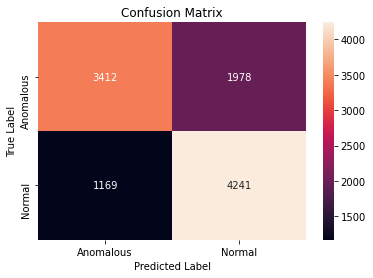

In [261]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [262]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      5390
           1       0.68      0.78      0.73      5410

    accuracy                           0.71     10800
   macro avg       0.71      0.71      0.71     10800
weighted avg       0.71      0.71      0.71     10800



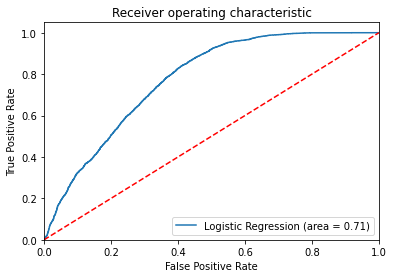

In [263]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [264]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [266]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 81.06018518518519
Test Prediction  72.58333333333333


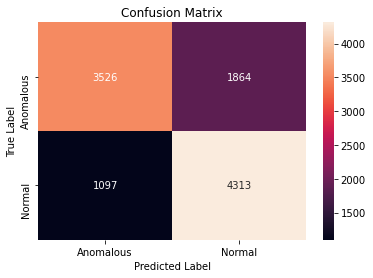

In [267]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [268]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70      5390
           1       0.70      0.80      0.74      5410

    accuracy                           0.73     10800
   macro avg       0.73      0.73      0.72     10800
weighted avg       0.73      0.73      0.72     10800



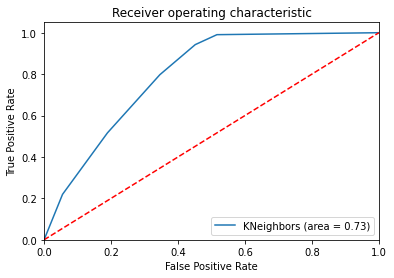

In [269]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [271]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [273]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 58.79629629629629
Test Prediction Score 58.81481481481482


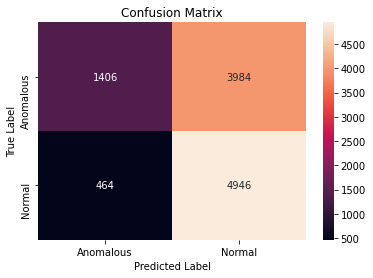

In [274]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [275]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.26      0.39      5390
           1       0.55      0.91      0.69      5410

    accuracy                           0.59     10800
   macro avg       0.65      0.59      0.54     10800
weighted avg       0.65      0.59      0.54     10800



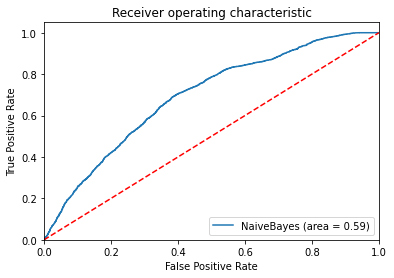

In [276]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [278]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 34560 samples, validate on 8640 samples
Epoch 1/10
34560/34560 [==============================] - 2s 49us/step - loss: 0.2457 - accuracy: 0.5590 - val_loss: 0.2403 - val_accuracy: 0.6023
Epoch 2/10
34560/34560 [==============================] - 1s 38us/step - loss: 0.2333 - accuracy: 0.6387 - val_loss: 0.2260 - val_accuracy: 0.6664
Epoch 3/10
34560/34560 [==============================] - 1s 37us/step - loss: 0.2192 - accuracy: 0.6755 - val_loss: 0.2133 - val_accuracy: 0.6853
Epoch 4/10
34560/34560 [==============================] - 1s 39us/step - loss: 0.2094 - accuracy: 0.6908 - val_loss: 0.2054 - val_accuracy: 0.6976
Epoch 5/10
34560/34560 [==============================] - 1s 39us/step - loss: 0.2032 - accuracy: 0.6968 - val_loss: 0.2003 - val_accuracy: 0.7030
Epoch 6/10
34560/34560 [==============================] - 1s 37us/step - loss: 0.1988 - accuracy: 0.7020 - val_loss: 0.1968 - val_accuracy: 0.7042
Epoch 7/10
34560/34560 [==============================] - 1s 38us/ste

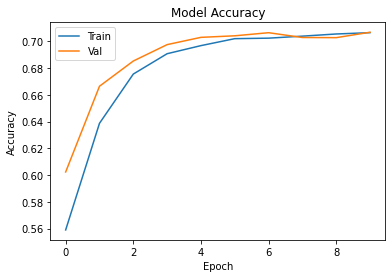

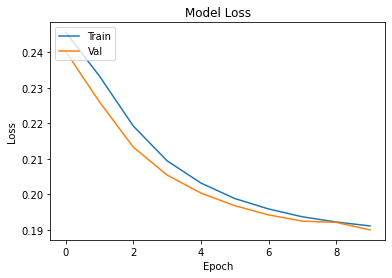

In [279]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [280]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.29%


3-Layer Neural Network

In [281]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 34560 samples, validate on 8640 samples
Epoch 1/15
34560/34560 [==============================] - 1s 39us/step - loss: 0.2501 - accuracy: 0.5014 - val_loss: 0.2502 - val_accuracy: 0.5045
Epoch 2/15
34560/34560 [==============================] - 1s 38us/step - loss: 0.2500 - accuracy: 0.5045 - val_loss: 0.2501 - val_accuracy: 0.4993
Epoch 3/15
34560/34560 [==============================] - 1s 38us/step - loss: 0.2500 - accuracy: 0.5045 - val_loss: 0.2500 - val_accuracy: 0.5122
Epoch 4/15
34560/34560 [==============================] - 1s 38us/step - loss: 0.2498 - accuracy: 0.5139 - val_loss: 0.2499 - val_accuracy: 0.5233
Epoch 5/15
34560/34560 [==============================] - 1s 38us/step - loss: 0.2496 - accuracy: 0.5203 - val_loss: 0.2495 - val_accuracy: 0.5380
Epoch 6/15
34560/34560 [==============================] - 1s 37us/step - loss: 0.2492 - accuracy: 0.5303 - val_loss: 0.2488 - val_accuracy: 0.5392
Epoch 7/15
34560/34560 [==============================] - 1s 37us/ste

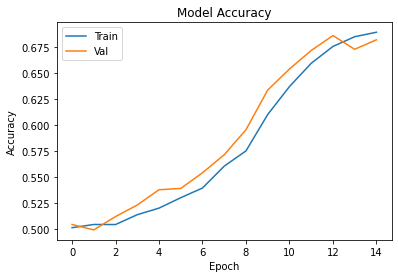

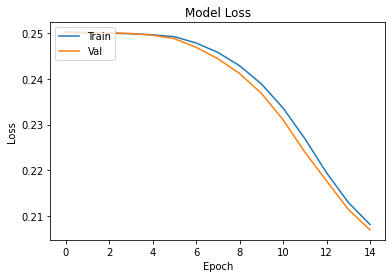

In [282]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [283]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 68.40%


4-Layer Neural Network



In [284]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 34560 samples, validate on 8640 samples
Epoch 1/30
34560/34560 [==============================] - 1s 41us/step - loss: 0.2511 - accuracy: 0.5161 - val_loss: 0.2495 - val_accuracy: 0.5229
Epoch 2/30
34560/34560 [==============================] - 1s 41us/step - loss: 0.2486 - accuracy: 0.5429 - val_loss: 0.2485 - val_accuracy: 0.5405
Epoch 3/30
34560/34560 [==============================] - 1s 39us/step - loss: 0.2476 - accuracy: 0.5585 - val_loss: 0.2477 - val_accuracy: 0.5495
Epoch 4/30
34560/34560 [==============================] - 1s 39us/step - loss: 0.2466 - accuracy: 0.5608 - val_loss: 0.2467 - val_accuracy: 0.5503
Epoch 5/30
34560/34560 [==============================] - 1s 39us/step - loss: 0.2449 - accuracy: 0.5627 - val_loss: 0.2446 - val_accuracy: 0.5620
Epoch 6/30
34560/34560 [==============================] - 1s 38us/step - loss: 0.2418 - accuracy: 0.5797 - val_loss: 0.2413 - val_accuracy: 0.5802
Epoch 7/30
34560/34560 [==============================] - 1s 39us/ste

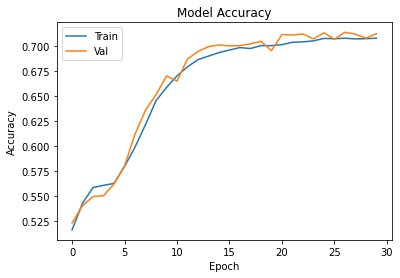

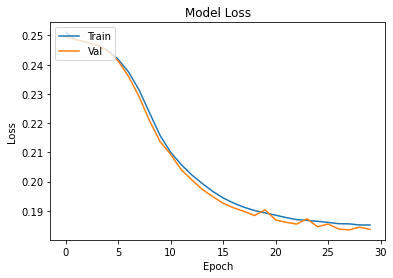

In [285]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [286]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.57%


5-Layer Neural Network Optimized

In [287]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 34560 samples, validate on 8640 samples
Epoch 1/100
34560/34560 [==============================] - 3s 86us/step - loss: 0.2021 - accuracy: 0.6670 - val_loss: 0.2287 - val_accuracy: 0.6050
Epoch 2/100
34560/34560 [==============================] - 2s 69us/step - loss: 0.1880 - accuracy: 0.7008 - val_loss: 0.1829 - val_accuracy: 0.7134
Epoch 3/100
34560/34560 [==============================] - 2s 69us/step - loss: 0.1855 - accuracy: 0.7049 - val_loss: 0.1832 - val_accuracy: 0.7192
Epoch 4/100
34560/34560 [==============================] - 2s 69us/step - loss: 0.1833 - accuracy: 0.7111 - val_loss: 0.1768 - val_accuracy: 0.7199
Epoch 5/100
34560/34560 [==============================] - 2s 69us/step - loss: 0.1820 - accuracy: 0.7136 - val_loss: 0.1766 - val_accuracy: 0.7157
Epoch 6/100
34560/34560 [==============================] - 3s 73us/step - loss: 0.1804 - accuracy: 0.7177 - val_loss: 0.1818 - val_accuracy: 0.7105
Epoch 7/100
34560/34560 [==============================] - 2s 7

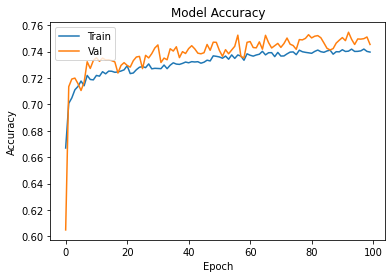

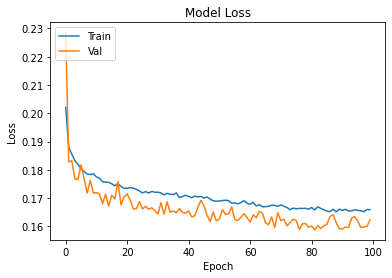

In [288]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [289]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.76%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [291]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8246990740740742


In [292]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [294]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.98611111111111
Test Prediction Score 87.75


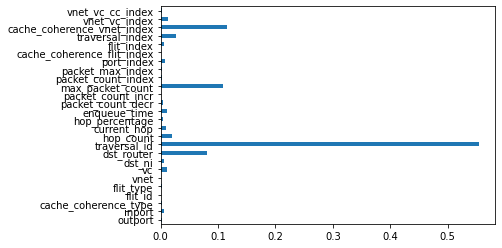

In [295]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

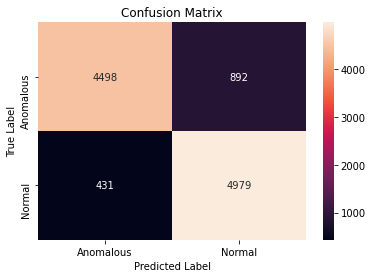

In [296]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [297]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      5390
           1       0.85      0.92      0.88      5410

    accuracy                           0.88     10800
   macro avg       0.88      0.88      0.88     10800
weighted avg       0.88      0.88      0.88     10800



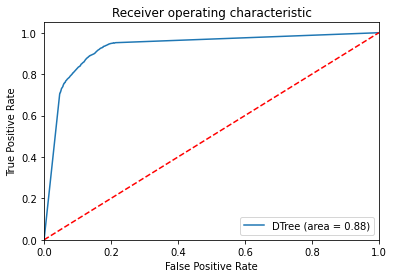

In [298]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [301]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [303]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.80787037037038
Test Prediction Score 88.17592592592592


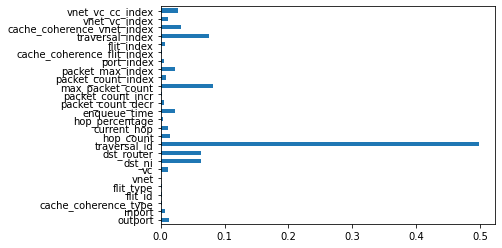

In [304]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

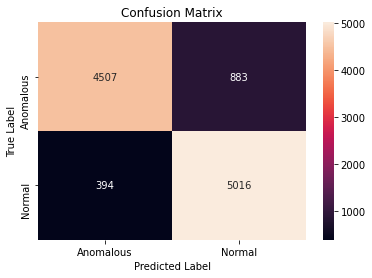

In [305]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [306]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      5390
           1       0.85      0.93      0.89      5410

    accuracy                           0.88     10800
   macro avg       0.88      0.88      0.88     10800
weighted avg       0.88      0.88      0.88     10800



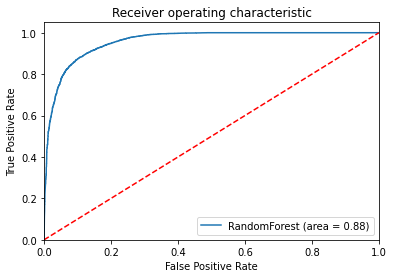

In [307]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [310]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [312]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.25462962962963
Test Prediction Score 93.72222222222221


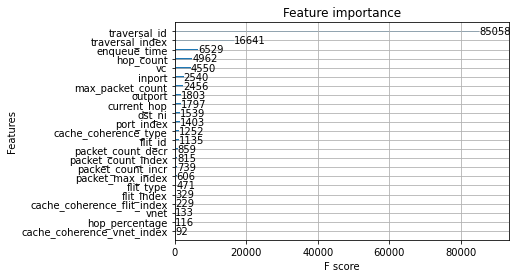

In [313]:
plot_importance(xgbc)
plt.show()

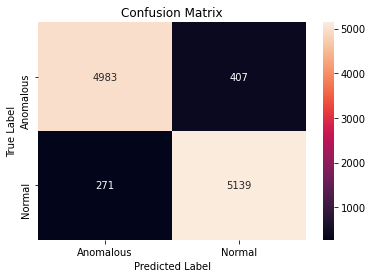

In [314]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [315]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5390
           1       0.93      0.95      0.94      5410

    accuracy                           0.94     10800
   macro avg       0.94      0.94      0.94     10800
weighted avg       0.94      0.94      0.94     10800



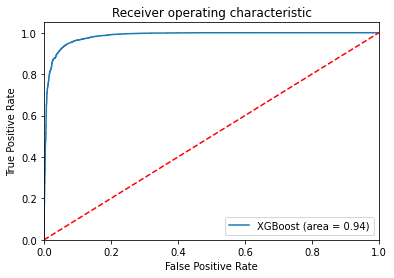

In [316]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [319]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [321]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 85.14120370370371
Test Prediction Score 78.71296296296296


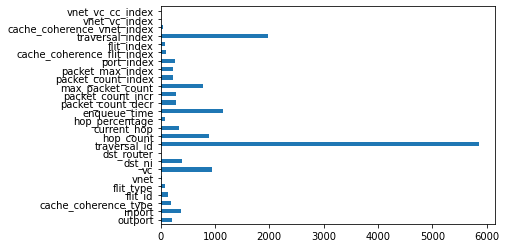

In [322]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

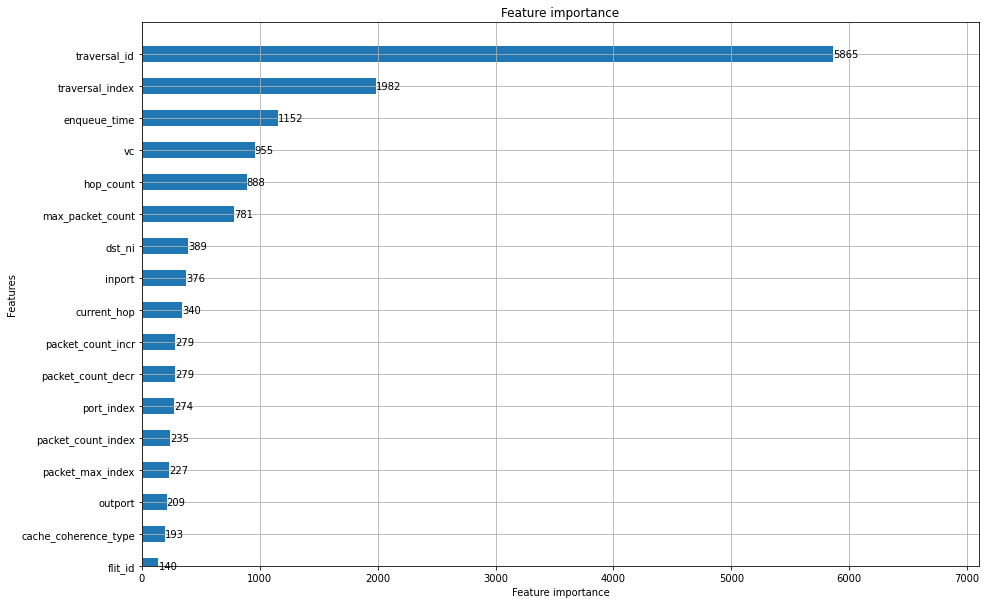

In [323]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [324]:
sorted(gbm.feature_importances_,reverse=True)

[5865,
 1982,
 1152,
 955,
 888,
 781,
 389,
 376,
 340,
 279,
 279,
 274,
 235,
 227,
 209,
 193,
 140,
 99,
 89,
 88,
 84,
 43,
 33,
 0,
 0,
 0]

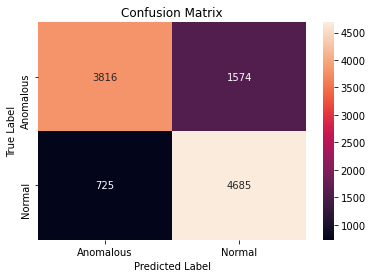

In [325]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [326]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      5390
           1       0.75      0.87      0.80      5410

    accuracy                           0.79     10800
   macro avg       0.79      0.79      0.79     10800
weighted avg       0.79      0.79      0.79     10800



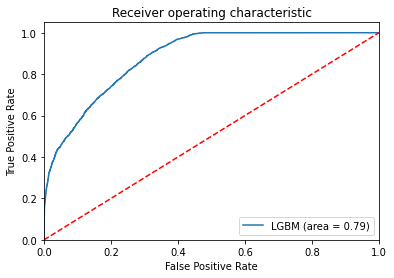

In [328]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()